In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras import models
from keras import layers

In [2]:
# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

In [3]:
# Display the first few rows to ensure it's loaded correctly
#print(df.head())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   label               120 non-null    int64  
 1   Area(cm^2)          120 non-null    float64
 2   W/L                 120 non-null    float64
 3   Patiole Length(mm)  120 non-null    float64
 4   Number of Pairs     120 non-null    int64  
 5   Ratio               120 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 5.8 KB
None


In [4]:
# Identify the target variable (assuming the column name is 'label')
target = df['label']

In [5]:
# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

In [6]:
# Verify the shapes to ensure they are correct
print("Target shape:", target.shape)
print("Features shape:", features.shape)

Target shape: (120,)
Features shape: (120, 5)


In [7]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder with the updated parameter
encoder = OneHotEncoder(sparse_output=False)


In [10]:
# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

In [11]:
# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

In [19]:
# Define the model
model = models.Sequential()
model.add(layers.Dense(36, activation='elu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(18,activation='elu'))
model.add(layers.Dense(9,activation='elu'))
model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))

C:\Users\VOSTRO\.conda\envs\my_env\Lib\site-packages\keras\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
val_epochs = 100
# Train the model
history = model.fit(x_train, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9691 - loss: 0.1232 - val_accuracy: 0.7500 - val_loss: 1.0488
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9046 - loss: 0.1952 - val_accuracy: 0.9000 - val_loss: 0.3310
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9445 - loss: 0.1729 - val_accuracy: 0.7500 - val_loss: 0.6192
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9689 - loss: 0.1052 - val_accuracy: 0.9000 - val_loss: 0.3187
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8858 - loss: 0.1705 - val_accuracy: 0.7500 - val_loss: 0.8017
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.2888 - val_accuracy: 0.7500 - val_loss: 0.6667
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9564 - loss: 0.1260 - val_accuracy: 0.8500 - val_loss: 0.4875
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9462 - loss: 0.1890 - val_accuracy: 0.8000 - v

In [27]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 1.0000 - loss: 0.0493
Test accuracy: 1.0


In [28]:
# Optional: Make predictions
predictions = model.predict(x_test)
print("Predictions shape:", predictions.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predictions shape: (24, 3)


In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

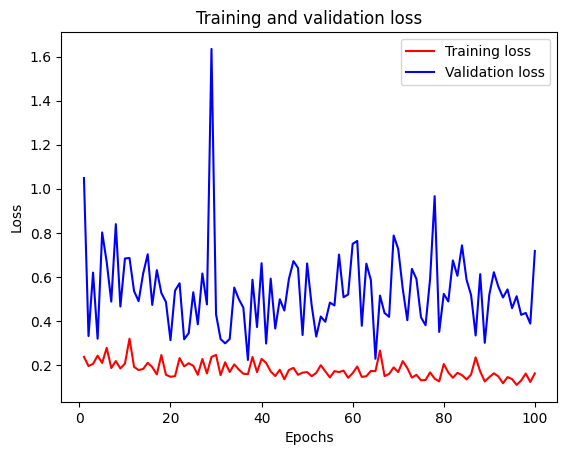

In [31]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs+1))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

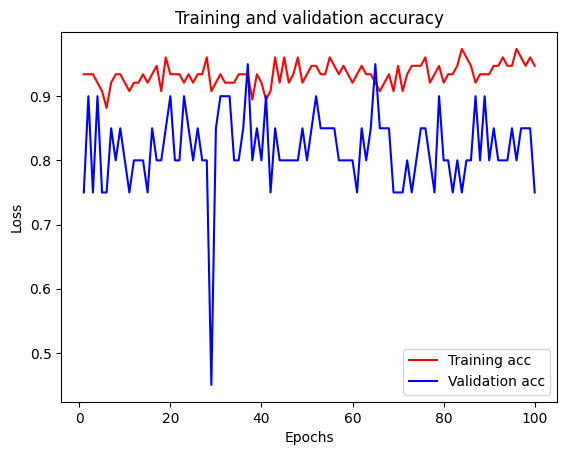

In [32]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()